<a href="https://www.kaggle.com/code/vikarna/market-mix-model?scriptVersionId=120650936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**What is a Marketing Mix Model?**

A Marketing Mix Model is a modeling technique used to determine market attribution, the estimated impact of each marketing channel that a given company is using.

Unlike Attribution Modeling, another technique used for marketing attribution, **Marketing Mix Models attempt to measure the impact of immeasurable marketing channels, like TV, radio, and newspapers.**

Generally, your output variable will be sales or conversions, but can also be things like website traffic. Your input variables typically consist of marketing spend by channel by period (day, week, month, quarter, etc…), but can also include other variables which we’ll get to later.

**Why is it so Useful?**

You can tap into the power of a marketing mix model in a number of ways, including:

To get a better understanding of the relationships between your marketing channels and your target metric (i.e. conversions).

To distinguish high ROI marketing channels from low ones and ultimately better optimize your marketing budget.

To predict future conversions based on given inputs.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/advertising.csv/Advertising.csv')

# EDA

Focusing on 3 most important EDA components 



**Correlation matrices**: a table that shows the correlation values for each pair-relationship

**Pair plots**: a simple way to visualize the relationships between each variable

**Feature importance**: techniques that assign a score for each feature based on how useful they are at predicting the target variable

<AxesSubplot:>

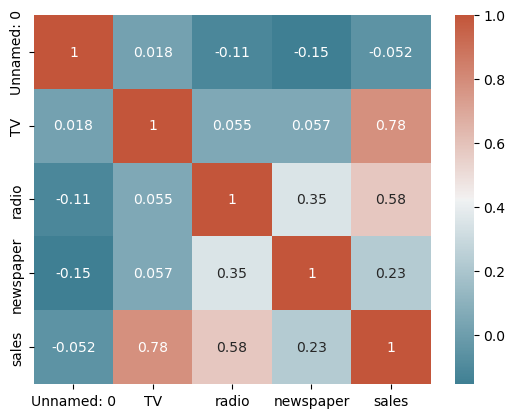

In [3]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

The correlation matrix above shows that there’s a strong correlation between TV and sales (0.78), a moderate correlation between radio and sales (0.58), and a weak correlation between newspaper and sales (0.23). It’s still too early to conclude anything but this is good to keep into consideration moving forward.

**Pair Plots**

A pair plot is a simple way to visualize the relationships between each variable — it’s similar to a correlation matrix except it shows a graph for each pair-relationship instead of a correlation. Now let’s take a look at the code for our pair plot.

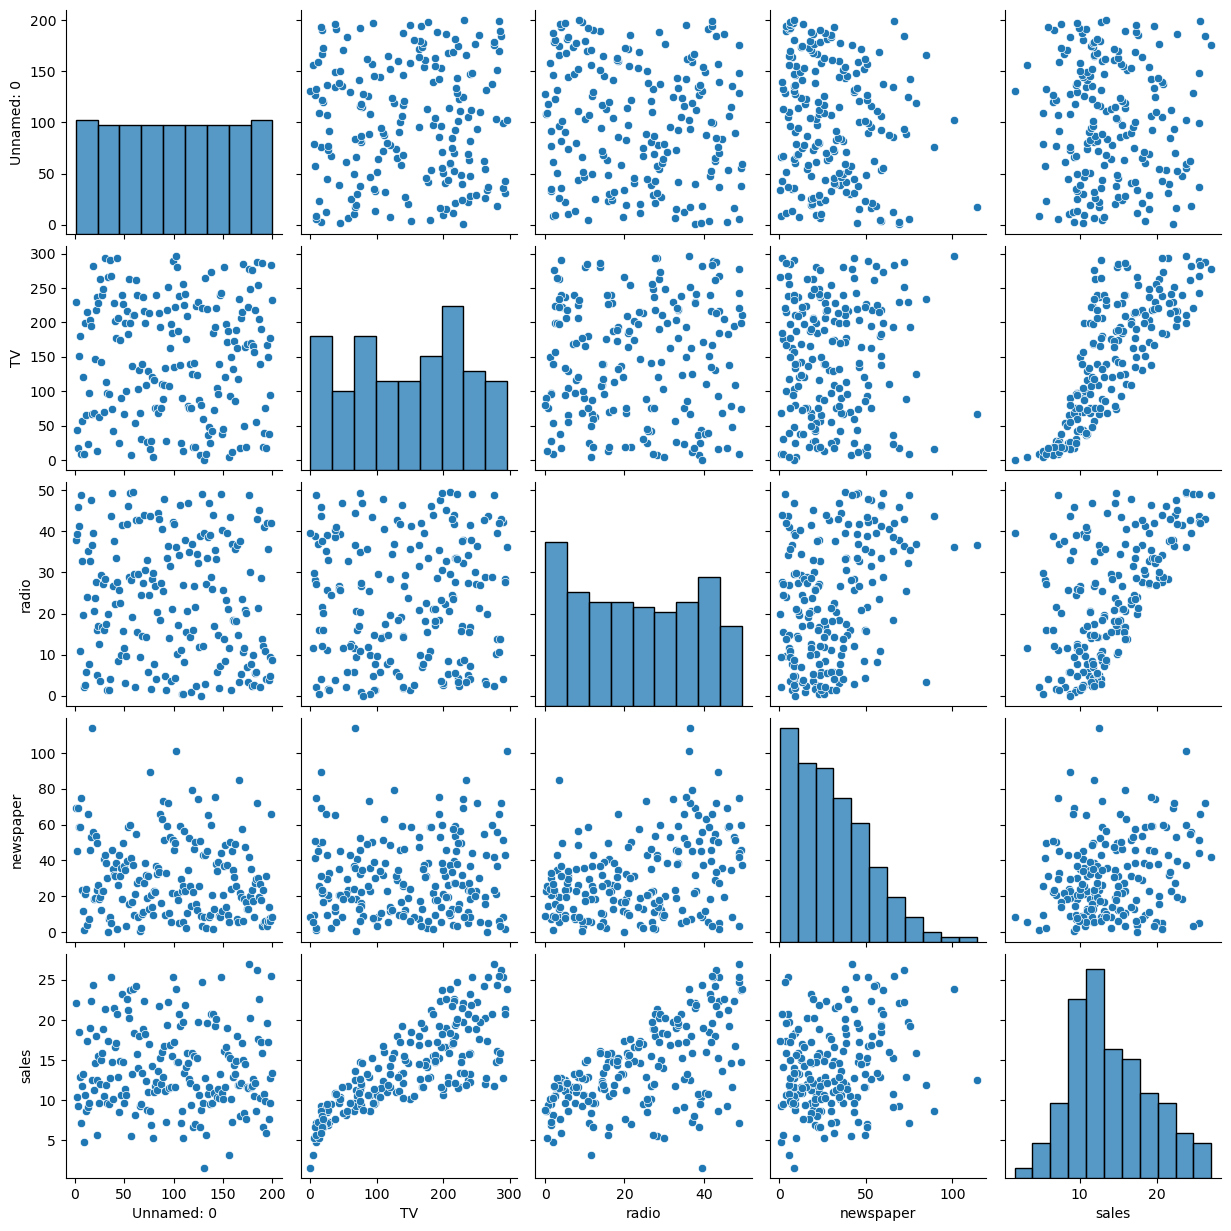

In [4]:
sns.pairplot(df)

We can see some consistency between our pair plot and our original correlation matrix. It looks like there’s a strong positive relationship between TV and sales, less for radio, and even less for newspapers.

**Feature Importance**

Feature importance allows you to determine how “important” each input variable is to predict the output variable. A feature is important if shuffling its values increases model error because this means the model relied on the feature for the prediction.

<AxesSubplot:>

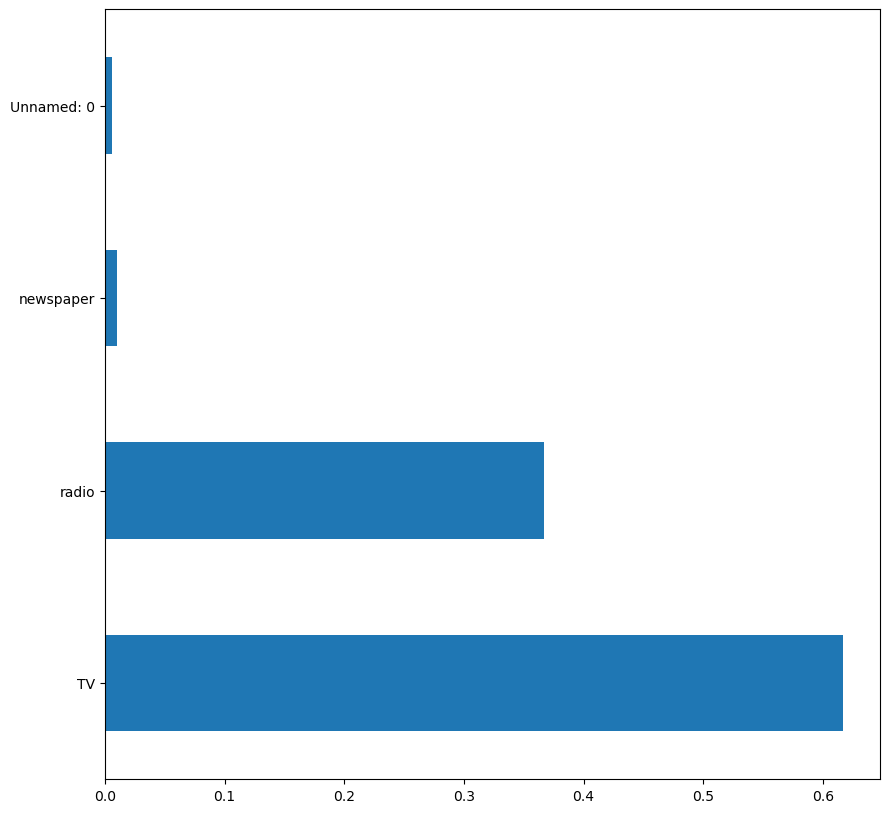

In [5]:
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

There seems to be a pattern, where TV is the most important, followed by radio, leaving newspaper last. 

# Building the Marketing Mix Model 

In [6]:
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        20:05:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

<Figure size 1200x480 with 0 Axes>

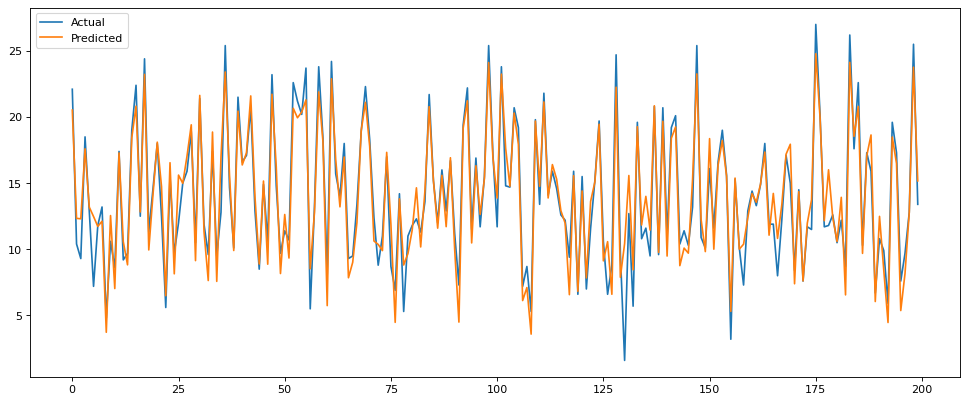

In [7]:
from matplotlib.pyplot import figure
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1,label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

It seems like this model does a good job of predicting sales given TV, radio, and newspaper spend.



# Interpreting the results 

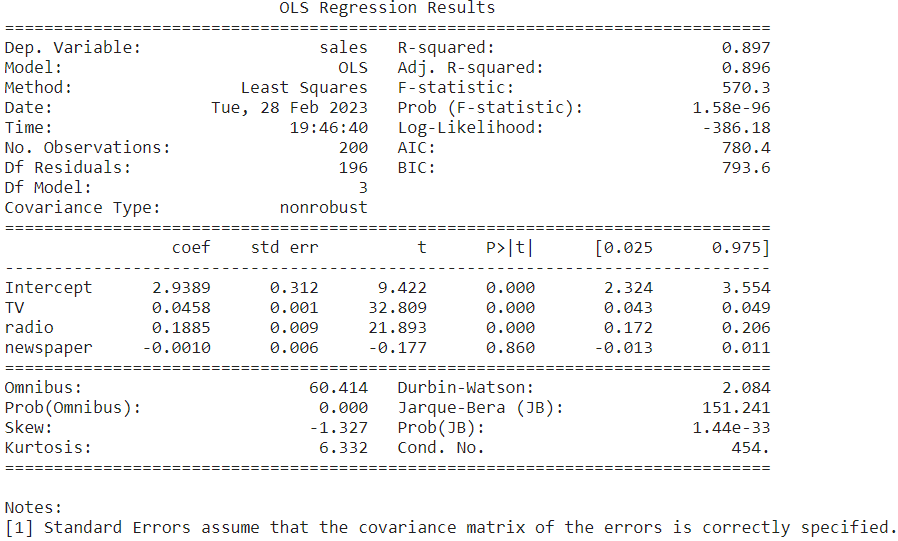

**The Adj. R-squared is 0.896**. This means that approximately 90% of the total variation in the data can be explained by the model. This also means that the model doesn’t account for 10% of the data used — this could be due to missing variables, for example if there was another marketing channel that wasn’t included, or simply due to noise in the data.

**Prob (F-statistic): 1.58e-96.** This probability value (p-value) represents the likelihood that there are no good predictors of the target variable — in this case, there are no good predictors of sales. Since the p-value is close to zero, we know that there is at least one predictor in the model that is a good predictor of sales.

 P>|t|, you can see the p-values for each predictor. 
 
 **The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which indicates that newspaper spend has no significant impact on sales. **